Build a bidirectional LSTM model using TensorFlow 2 to perform sentiment classification on IMDB movie reviews (positive or negative).

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [9]:
#Load IMDB dataset
vocab_size=10000
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [10]:
#Pad sequence to a uniform length
maxlen=300
X_train=tf.keras.preprocessing.sequence.pad_sequences(X_train,maxlen=maxlen)
X_test=tf.keras.preprocessing.sequence.pad_sequences(X_test,maxlen=maxlen)

In [11]:
#Define the Bi-LSTM model
model=Sequential([
    layers.Embedding(input_dim=vocab_size,output_dim=128,input_length=maxlen),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')
])

c:\Users\ADARSH\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train,epochs=3,batch_size=64,validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 126s 392ms/step - accuracy: 0.6858 - loss: 0.5597 - val_accuracy: 0.8564 - val_loss: 0.3307
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 441ms/step - accuracy: 0.8999 - loss: 0.2609 - val_accuracy: 0.8536 - val_loss: 0.4105
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 456ms/step - accuracy: 0.9402 - loss: 0.1650 - val_accuracy: 0.8690 - val_loss: 0.3833


In [14]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.86


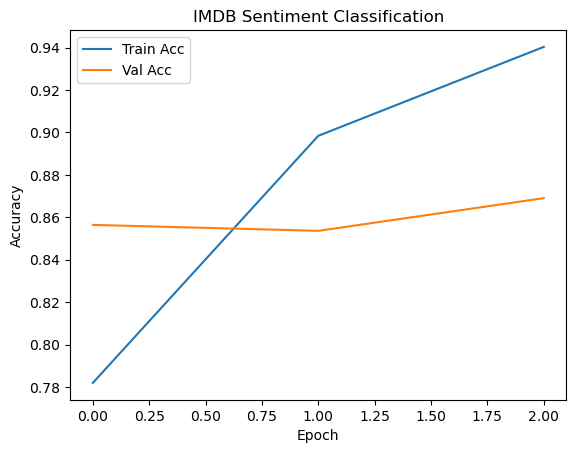

In [15]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("IMDB Sentiment Classification")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()